In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Decision_Tree.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df=df[['Survived','Sex', 'Age','Fare']]

In [5]:
df.isna().sum()

Survived      0
Sex           0
Age         177
Fare          0
dtype: int64

In [6]:
import numpy as np

In [7]:
df.Age = df.Age.fillna(np.mean(df.Age))

In [8]:
df.isna().sum()

Survived    0
Sex         0
Age         0
Fare        0
dtype: int64

In [9]:
dummies = pd.get_dummies(df.Sex)

In [10]:
df1 = pd.concat([df,dummies], axis = 1)

In [11]:
df1.head()

,Survived,Sex,Age,Fare,female,male
0,0,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,1,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,0,male,35.0,8.0500,0,1


In [12]:
df1.drop(['Sex','male'],axis = 1,inplace = True)

In [13]:
df1.head()

,Survived,Age,Fare,female
0,0,22.0,7.2500,0
1,1,38.0,71.2833,1
2,1,26.0,7.9250,1
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [14]:
x = df1.iloc[:,1:4]
y = df1.iloc[:,0]

In [15]:
x.head()

,Age,Fare,female
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [16]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [19]:
from sklearn import tree

In [21]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini').fit(x_tr,y_tr)

In [22]:
y_te_pred = dtree.predict(x_te)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
accuracy_score(y_te, y_te_pred)

0.7798507462686567

In [25]:
confusion_matrix(y_te, y_te_pred)

array([[145,  29],
       [ 30,  64]], dtype=int64)

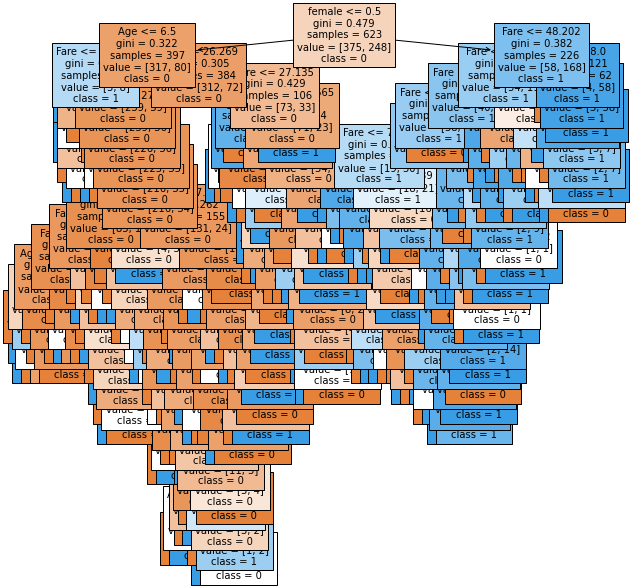

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
ptree = tree.plot_tree(dtree, feature_names = ['Age','Fare','female'], class_names = ['0','1'], filled = True, fontsize = 10)